<a href="https://colab.research.google.com/github/DikshaNadiga123/ML-LAB/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

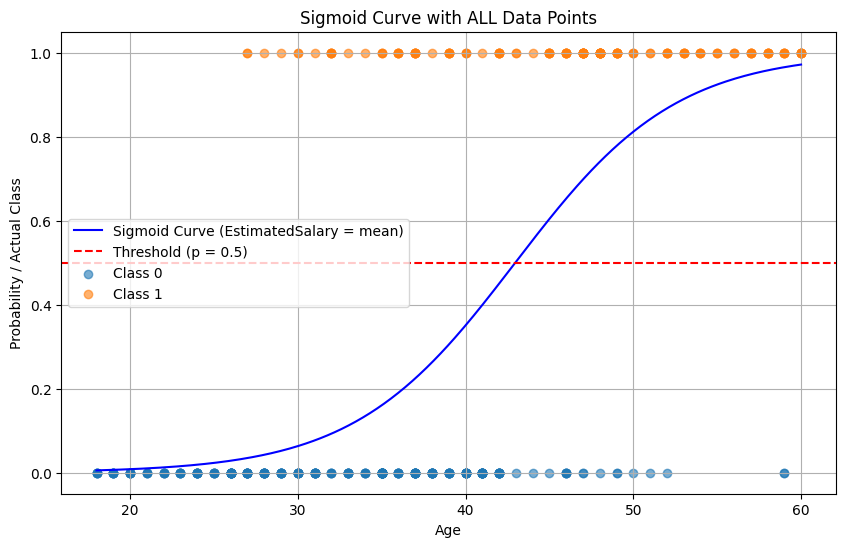

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('/content/Social_Network_Ads.csv')

# Select features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Coefficients and intercept
w1, w2 = model.coef_[0]
b = model.intercept_[0]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fix EstimatedSalary at mean
fixed_salary = X['EstimatedSalary'].mean()

# Generate Age range and compute sigmoid
age_vals = np.linspace(X['Age'].min(), X['Age'].max(), 300)
z = w1 * age_vals + w2 * fixed_salary + b
probs = sigmoid(z)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(age_vals, probs, color='blue', label='Sigmoid Curve (EstimatedSalary = mean)')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold (p = 0.5)')

# Plot ALL actual data points
for label in [0, 1]:
    plt.scatter(X['Age'][y == label],
                y[y == label],
                label=f'Class {label}',
                alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Probability / Actual Class')
plt.title('Sigmoid Curve with ALL Data Points')
plt.legend()
plt.grid(True)
plt.show()